Testing new figures
-------------------

In [1]:
%load_ext autoreload
%autoreload 2

import rnavigate as MaP
import matplotlib.pyplot as plt
import numpy as np

In [7]:
path = 'data/'
def kwargs(sample):
    kwargs = {"sample": sample,
              "shapemap": path+sample+"_rnasep_profile.txt",
              "ct": path+"RNaseP.ct",
              "ss": path+"RC_CRYSTAL_STRUCTURE.xrna",
              "ringmap": path+sample+"-rnasep.corrs",
              "pairmap": path+sample+"-rnasep-pairmap.txt",
              "log": path+sample+"_shapemapper_log.txt",
              "dance_prefix": path+sample+"_rnasep",
              "shapejump": path+"example-rnasep-deletions.txt",
              "fasta": path+"RNaseP-noSC.fasta",
              "pdb": path+"3dhs_Correct.pdb",
              "pdb_kwargs":{"chain": "A"}}
    return kwargs

example1 = MaP.Sample(**kwargs("example1"))
example2 = MaP.Sample(**kwargs("example2"))
example3 = MaP.Sample(**kwargs("example3"))
example4 = MaP.Sample(**kwargs("example4"))
samples = [example1, example2, example3, example4]

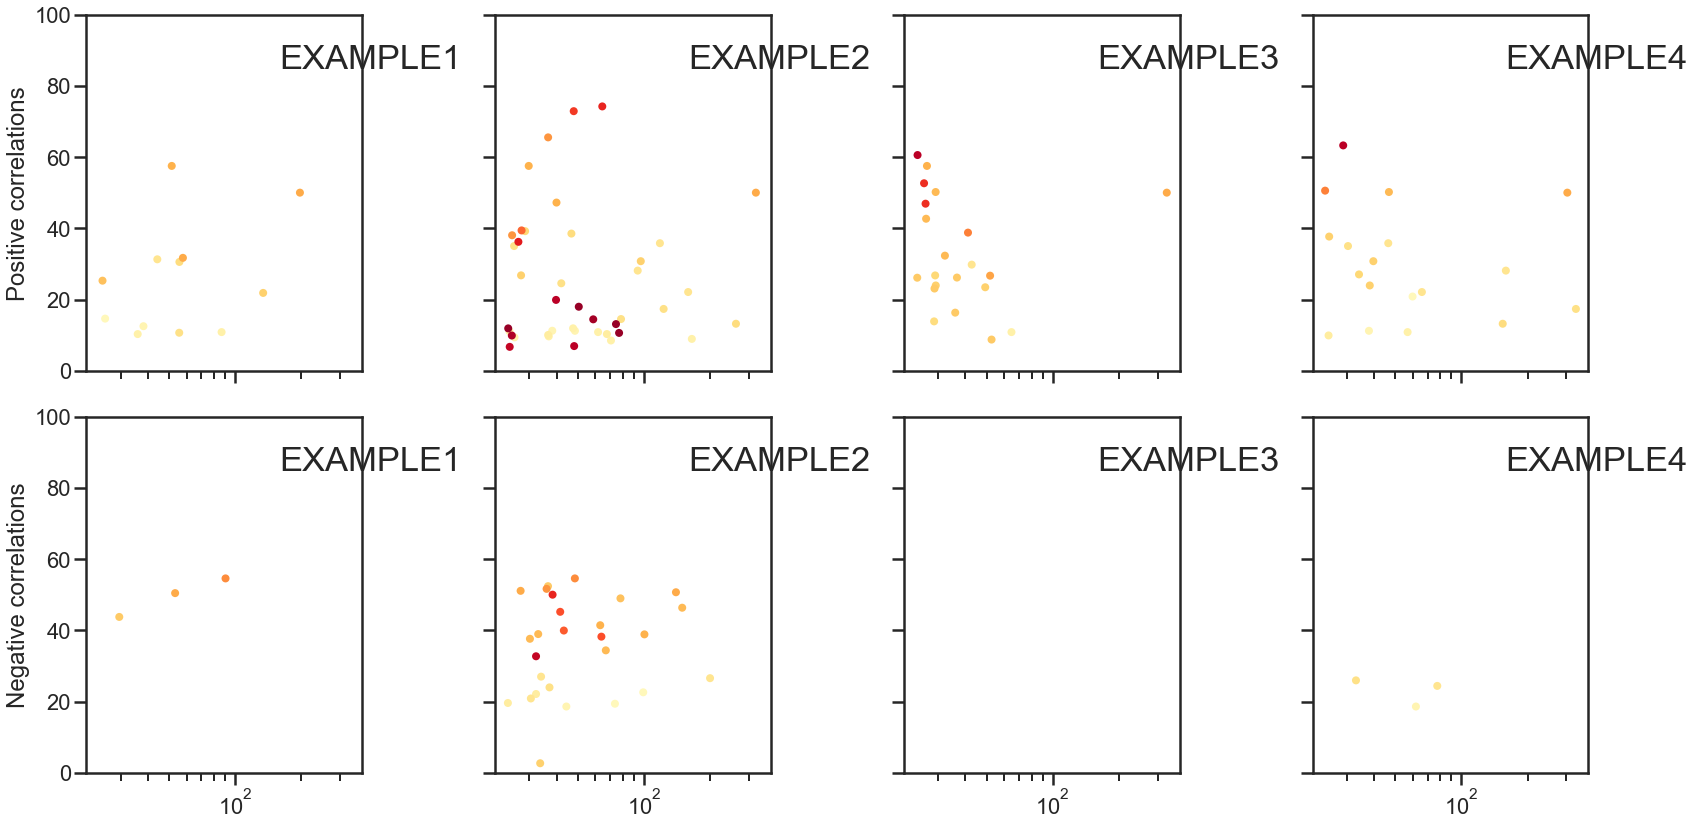

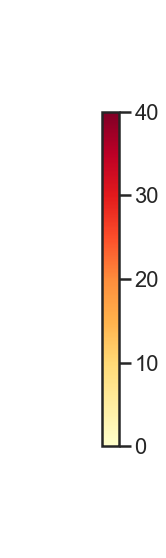

In [9]:
fig, ax = plt.subplots(2, 4, figsize=(24, 12), sharey=True, sharex=True)
for i, sample in enumerate(samples):
    sample.data["ringmap"].set_3d_distances(sample.data["pdb"], "O2'")
    data = sample.data["ringmap"].data
    data["cd"] = [sample.data["ct"].contactDistance(
        i+1, j+1) for _, i, j in data[["i", "j"]].itertuples()]
    data.sort_values(by=["cd"], inplace=True)
    mask = data["Sign"] == 1
    im = ax[0, i].scatter(data.loc[mask, "Statistic"], data.loc[mask, "Distance"],
                          c=data.loc[mask, "cd"], cmap="YlOrRd", marker='.', vmin=0, vmax=40)
    ax[0, i].annotate(sample.sample[:].upper(), (0.7, 0.85),
                      xycoords="axes fraction", fontsize="x-large")
    ax[1, i].annotate(sample.sample[:].upper(), (0.7, 0.85),
                      xycoords="axes fraction", fontsize="x-large")
    ax[1, i].scatter(data.loc[~mask, "Statistic"], data.loc[~mask, "Distance"],
                     c=data.loc[~mask, "cd"], cmap="YlOrRd", marker='.', vmin=0, vmax=40)
ax[0, 0].set(xscale="log", ylim=[0,100])
ax[0, 0].set_ylabel("Positive correlations")
ax[1, 0].set_ylabel("Negative correlations")
plt.tight_layout()

fig, ax = plt.subplots(1, figsize=(2, 10))
fig.colorbar(im, ax=ax)
ax.set_axis_off()
